In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn.linear_model as lm
import sklearn.metrics as metrics
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score
import patsy as pts

In [2]:
import torch as tc

OSError: [WinError 126] Belirtilen modül bulunamadı. Error loading "C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\lib\shm.dll" or one of its dependencies.

In [2]:
df = pd.read_csv(r"C:\Data Analysis\Data-Analysis\kaggle\train_abalone.csv", index_col=0)
df2 = pd.read_csv(r"C:\Data Analysis\Data-Analysis\kaggle\test.csv",index_col=0)
df2
df = pd.concat([df, df2])

In [5]:
target = df["Rings"]
z = df.drop(["Rings"], axis="columns")
pts.dmatrices

<function patsy.highlevel.dmatrices(formula_like, data={}, eval_env=0, NA_action='drop', return_type='matrix')>

In [ ]:
z.describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
count,151026.000000,151026.000000,151026.000000,151026.000000,151026.000000,151026.000000,151026.000000
mean,0.517230,0.401792,0.135579,0.789446,0.340958,0.169421,0.225989
std,0.117974,0.097804,0.038075,0.457637,0.204345,0.100833,0.130052
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.445000,0.345000,0.110000,0.419500,0.177500,0.086500,0.120000
50%,0.545000,0.425000,0.140000,0.799500,0.329500,0.166000,0.225000
75%,0.600000,0.470000,0.160000,1.068000,0.463500,0.232500,0.305000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


<AxesSubplot: xlabel='Rings', ylabel='Count'>

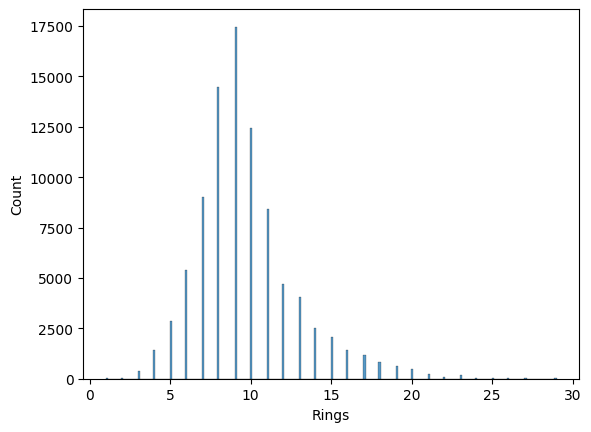

In [ ]:
import seaborn as sns
sns.histplot(target)

In [ ]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

In [ ]:
target = df["Rings"]
z = df.drop(["Rings"], axis="columns")

In [ ]:
df.corr()

C:\Users\yusuf\AppData\Local\Temp\ipykernel_3756\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
Length,1.000000,0.989724,0.912872,0.931075,0.909383,0.912992,0.910864,0.623786
Diameter,0.989724,1.000000,0.916491,0.933570,0.908280,0.914460,0.917730,0.636832
Height,0.912872,0.916491,1.000000,0.899258,0.858838,0.883094,0.901751,0.665772
Whole weight,0.931075,0.933570,0.899258,1.000000,0.971124,0.974297,0.963936,0.617274
Whole weight.1,0.909383,0.908280,0.858838,0.971124,1.000000,0.949349,0.911469,0.515067
Whole weight.2,0.912992,0.914460,0.883094,0.974297,0.949349,1.000000,0.936684,0.588954
Shell weight,0.910864,0.917730,0.901751,0.963936,0.911469,0.936684,1.000000,0.694766
Rings,0.623786,0.636832,0.665772,0.617274,0.515067,0.588954,0.694766,1.000000


In [ ]:
df["Volume"] = df["Length"]*df["Height"]*df["Diameter"]

In [ ]:
df["Volume2"] = df["Volume"]**2
df["Volume3"] = df["Volume"]**3

In [ ]:
df = df.drop(["Length", "Diameter", "Height"], axis= "columns")

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df

,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Volume,Volume2,Volume3,Sex_I,Sex_M
id,,,,,,,,,,
0,0.7715,0.3285,0.1465,0.2400,11.0,0.035475,1.258476e-03,4.464442e-05,0,0
1,1.1300,0.4580,0.2765,0.3200,11.0,0.044762,2.003592e-03,8.968378e-05,0,0
2,0.0210,0.0055,0.0030,0.0050,6.0,0.000440,1.936000e-07,8.518400e-11,1,0
3,0.9145,0.3755,0.2055,0.2500,10.0,0.042394,1.797230e-03,7.619132e-05,0,1
4,0.7820,0.3695,0.1600,0.1975,9.0,0.030664,9.402656e-04,2.883207e-05,1,0
...,...,...,...,...,...,...,...,...,...,...
151021,0.1775,0.0735,0.0265,0.0500,NaN,0.007625,5.813300e-05,4.432351e-07,1,0
151022,0.8445,0.3885,0.1670,0.2050,NaN,0.031211,9.741421e-04,3.040419e-05,0,0
151023,1.1220,0.3930,0.2000,0.2650,NaN,0.040238,1.619097e-03,6.514921e-05,1,0


In [ ]:
df.columns

Index(['Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight',
       'Rings', 'Volume', 'Volume2', 'Volume3', 'Sex_I', 'Sex_M'],
      dtype='object')

In [ ]:
df.rename(columns=lambda x: x.strip(), inplace=True)

In [ ]:
df.columns

Index(['Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight',
       'Rings', 'Volume', 'Volume2', 'Volume3', 'Sex_I', 'Sex_M'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.replace(' ', '')

In [ ]:
df.columns = df.columns.str.replace('.', '_')

C:\Users\yusuf\AppData\Local\Temp\ipykernel_3756\2262415099.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '_')


In [ ]:
df.columns

Index(['Wholeweight', 'Wholeweight_1', 'Wholeweight_2', 'Shellweight', 'Rings',
       'Volume', 'Volume2', 'Volume3', 'Sex_I', 'Sex_M'],
      dtype='object')

In [ ]:
x_hat2 = df.iloc[90615:]

In [ ]:
x_hat2 = x_hat2.drop(["Rings"], axis="columns")

In [ ]:
model_extra = ("Rings~ Sex_M + Sex_I + (Wholeweight + Wholeweight_1+Wholeweight_2+Shellweight+Volume+Volume2+Volume3)**2")
tmp = smf.ols(model_extra,data=df)

In [ ]:
x_full = tmp.data.exog
y_full = tmp.data.endog

In [ ]:
x_full

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.46444228e-05, 1.58376090e-06, 5.61839179e-08],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.96837780e-05, 4.01438043e-06, 1.79689690e-07],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        8.51840000e-11, 3.74809600e-14, 1.64916224e-17],
       ...,
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.53618194e-06, 3.45865472e-08, 4.71665391e-10],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        3.40982718e-07, 2.38219051e-09, 1.66425785e-11],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.63521997e-06, 3.63989758e-08, 5.02760854e-10]])

In [ ]:
from sklearn.decomposition import PCA
x_full = StandardScaler().fit_transform(x_full)
pc =PCA(n_components=6)
x_full = pc.fit_transform(x_full)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
new_df = pd.DataFrame(x_full)

In [ ]:
df2

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
id,,,,,,,,
90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050
...,...,...,...,...,...,...,...,...
151021,I,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500
151022,F,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050
151023,I,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650


In [ ]:
x_full, x_hat = new_df.iloc[0:90615], new_df.iloc[90615:]

In [ ]:
model_extra = ("Sex_M~ Sex_M + Sex_I + (Wholeweight + Wholeweight_1+Wholeweight_2+Shellweight+Volume+Volume2+Volume3)**2")
tmp = smf.ols(model_extra,data=x_hat2)

In [ ]:
x_hat3 = tmp.data.exog

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_full, y_full, test_size=.000000001, shuffle=True)

In [ ]:
y_train

array([12.,  9., 11., ..., 13.,  8., 13.])

In [ ]:
X_train

,0,1,2,3,4,5
80771,-0.452195,-0.683192,1.587033,-0.363151,-0.089188,-0.351216
27307,4.578197,-1.667497,0.932228,-0.080899,1.029947,0.204684
62862,-1.410307,-0.461358,1.642477,-0.520043,0.124474,0.237128
14186,0.111220,-0.719229,0.121330,1.076687,-0.425350,0.353118
89260,-4.111968,1.122819,-0.925720,-0.259586,0.200182,-0.041666
...,...,...,...,...,...,...
14943,-2.738602,0.452963,-0.842487,0.332296,0.456619,-0.392357
5391,11.380849,0.827320,-1.583655,-0.137103,-1.268919,-0.565142
60987,7.598936,-0.168337,-0.957970,0.527325,-0.506796,0.133622
30303,-4.037681,1.100225,-0.918540,-0.231831,0.202879,-0.055408


In [ ]:
df3 = pd.DataFrame(x_hat3)

In [ ]:
df3

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.0,1.0,0.0,1.2380,0.6185,0.3125,0.3005,0.047488,0.002255,1.070915e-04,...,0.093906,0.014840,0.000705,3.346610e-05,0.014270,0.000678,3.218100e-05,1.070915e-04,5.085575e-06,2.415044e-07
1,1.0,1.0,0.0,0.9830,0.4785,0.2195,0.2750,0.042688,0.001822,7.778886e-05,...,0.060363,0.009370,0.000400,1.707466e-05,0.011739,0.000501,2.139194e-05,7.778886e-05,3.320651e-06,1.417519e-07
2,1.0,1.0,0.0,0.8395,0.3525,0.1845,0.2405,0.032928,0.001084,3.570229e-05,...,0.044372,0.006075,0.000200,6.587072e-06,0.007919,0.000261,8.586400e-06,3.570229e-05,1.175605e-06,3.871032e-08
3,1.0,1.0,0.0,0.8740,0.3525,0.1865,0.2350,0.040498,0.001640,6.642274e-05,...,0.043827,0.007553,0.000306,1.238784e-05,0.009517,0.000385,1.560934e-05,6.642274e-05,2.690022e-06,1.089418e-07
4,1.0,0.0,1.0,0.3580,0.1575,0.0670,0.1050,0.014836,0.000220,3.265671e-06,...,0.007035,0.000994,0.000015,2.188000e-07,0.001558,0.000023,3.428955e-07,3.265671e-06,4.845031e-08,7.188209e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60406,1.0,0.0,1.0,0.1775,0.0735,0.0265,0.0500,0.007625,0.000058,4.432351e-07,...,0.001325,0.000202,0.000002,1.174573e-08,0.000381,0.000003,2.216175e-08,4.432351e-07,3.379446e-09,2.576658e-11
60407,1.0,0.0,0.0,0.8445,0.3885,0.1670,0.2050,0.031211,0.000974,3.040419e-05,...,0.034235,0.005212,0.000163,5.077500e-06,0.006398,0.000200,6.232860e-06,3.040419e-05,9.489529e-07,2.961801e-08
60408,1.0,0.0,1.0,1.1220,0.3930,0.2000,0.2650,0.040238,0.001619,6.514921e-05,...,0.053000,0.008048,0.000324,1.302984e-05,0.010663,0.000429,1.726454e-05,6.514921e-05,2.621474e-06,1.054829e-07
60409,1.0,0.0,0.0,1.4935,0.5885,0.3575,0.4350,0.065835,0.004334,2.853452e-04,...,0.155512,0.023536,0.001549,1.020109e-04,0.028638,0.001885,1.241251e-04,2.853452e-04,1.878570e-05,1.236756e-06


In [ ]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler())
X_train = pipe.fit_transform(X_train)
X_test = pipe.fit_transform(X_test)
lasso = lm.Lasso()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    'alpha':np.arange(0.005, 100, 0.005)
}
random_search = RandomizedSearchCV(lasso, param_distributions=params,
                                   n_iter=350, cv=5,
                                   verbose=True,
                                   scoring = "neg_mean_squared_log_error")
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 350 candidates, totalling 1750 fits


RandomizedSearchCV(cv=5, estimator=Lasso(), n_iter=350,
                   param_distributions={'alpha': array([5.0000e-03, 1.0000e-02, 1.5000e-02, ..., 9.9985e+01, 9.9990e+01,
       9.9995e+01])},
                   scoring='neg_mean_squared_log_error', verbose=True)

In [ ]:
random_search.best_score_

-0.05162321091581211

In [ ]:
from sklearn.metrics import mean_squared_log_error

In [ ]:
x_hat3 = StandardScaler().fit_transform(x_hat3)
x_hat3 = pc.transform(x_hat3)

y_pred = random_search.best_estimator_.predict(x_hat3)
y_pred = (y_pred)

In [ ]:
y_pred

array([13.42880192, 11.12574485,  9.26567978, ..., 10.13374226,
       18.40961366,  5.81359313])

In [ ]:
submission = pd.DataFrame({
    'id': df2.index,
    'Rings': y_pred
})
submission

,id,Rings
0,90615,13.428802
1,90616,11.125745
2,90617,9.265680
3,90618,9.887583
4,90619,5.388793
...,...,...
60406,151021,4.548187
60407,151022,8.523138
60408,151023,10.133742
60409,151024,18.409614


In [ ]:
submission.to_csv("lasso_flex4.csv", index=False)